In [34]:
%load_ext autoreload
%autoreload 2

from linares_plot import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
df= pd.read_csv('dades_tallers_csv.csv')

In [93]:
df.columns

Index(['Marca temporal', 'A quin centre educatiu estàs?', 'A quin curs vas?',
       'Curs processat', 'Gènere?', 'El cervell...', 'El context...',
       'Els automatismes del cervell...', 'El cervell humà...',
       'Els anuncis publicitaris...',
       'la informació que consumim i la manera en que parlem...',
       'La discriminació...',
       'Penses que el coneixement científic ajuda a combatre situacions de discriminació?',
       'M'agraden les ciències', 'considero',
       'Veig la utilitat de la ciència en els nostres problemes del dia a dia',
       'T'ha agradat el taller?',
       'Si us plau, comenta si hi ha alguna cosa que t'ha agradat molt o alguna que no t'ha agradat gens',
       'Mitjana', 'Bona nota'],
      dtype='object')

In [94]:
df['A quin centre educatiu estàs?'].unique()
df['cole_ses'] = df['A quin centre educatiu estàs?'].replace(['IE El Molí', 'IE Martí Pous', 'La Serreta', 'IE La Guineueta',
       'Escola Pia Sarrià Calassanç', 'Institut de Miami',
       'Escola Pia Balaguer', 'Maristes Champagnat',
       'Adella de Trenquelleon', 'Sopeña', 'Escola Guinardó',
       'Adela de Trenquelleon'], [0,1,0,0,2,0,2,2,1,2,1,1])

In [113]:
df['valora_taller'] = df["T'ha agradat el taller?"]

In [114]:
for i in range(len(df)):
    df['Mitjana'].iloc[i] = df['Mitjana'].iloc[i].replace(',', '.')
    
df['Mitjana']

C:\Users\david\AppData\Local\Temp\ipykernel_14552\2383433028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mitjana'].iloc[i] = df['Mitjana'].iloc[i].replace(',', '.')


0      0.1428571429
1                 1
2      0.4285714286
3      0.8571428571
4      0.8571428571
           ...     
446    0.8333333333
447    0.6666666667
448    0.8333333333
449    0.6666666667
450    0.8333333333
Name: Mitjana, Length: 451, dtype: object

In [115]:
df['Mitjana_n'] = df['Mitjana'].astype(float)
df['genere'] = df['Gènere?']

In [116]:
df1=df.loc[df['Gènere?']!='Altres / no aplica']
len(df1)

442

C:\Users\david\anaconda3\envs\python3\lib\site-packages\linares_plot.py:124: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)
C:\Users\david\anaconda3\envs\python3\lib\site-packages\linares_plot.py:124: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx)[y], statfunction=statistic, n_samples=reps,  alpha=1-CI)    # calculate the bootstrap (data no subject base)


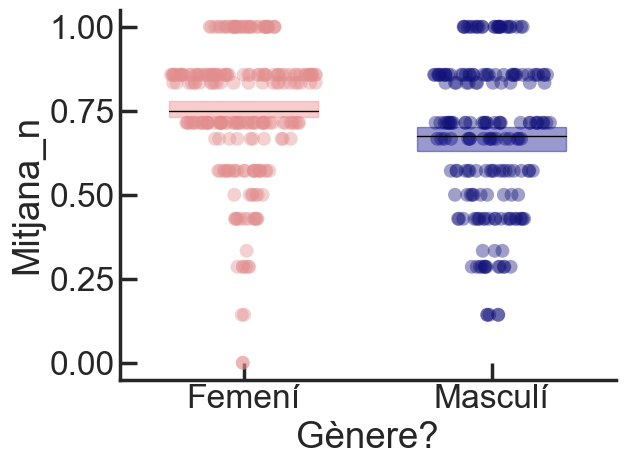

In [117]:
linares_plot(x='Gènere?', y='Mitjana_n', df=df1, palette = ['lightcoral', 'darkblue'], order=['Femení', 'Masculí'],
             hue=None, hue_order=None, point_size=10, alpha=0.4, CI=0.95,
                  width=0.6, statistic=np.mean, by_subj=False, subj_col=None, plot_box=True, MS=12, LW=4, 
                  reps=100, leg=True, fill_box=True, alpha_box=0.4, sep_axis=False, L_size=16, loc_l='best', 
                  leg_inside=True)

In [118]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [119]:
mod = ols(formula='Mitjana_n ~ genere', data=df1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

In [120]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mitjana_n   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.77
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           0.000233
Time:                        17:31:35   Log-Likelihood:                 67.351
No. Observations:                 442   AIC:                            -130.7
Df Residuals:                     440   BIC:                            -122.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7500      0.013     56.377      0.000       0.724       0.776
genere[T.Masculí]    -0.0740      0.020     -3.711      0.000      -0.113      -0.035
==============================================================================
Omnibus:                       33.880   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.519
Skew:                          -0.716   Prob(JB):                     2.62e-09
Kurtosis:                       3.311   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')

                                 
                                 Anova Table
             sum_sq     df          F    PR(>F)
genere     0.597232    1.0  13.772128  0.000233
Residual  19.080706  440.0        NaN       NaN
                                 


In [122]:
df1.considero.unique()
df1['considero_x'] = df1['considero'].replace(["No, no m'agraden",
       "No, m'agradaria però són molt difícils o no em veig capaç", 'Si'], ['No', 'No atrevir', 'Si'])

df1['considero_n'] = df1['considero'].replace(["No, no m'agraden",
       "No, m'agradaria però són molt difícils o no em veig capaç", 'Si'], [0, 10,20])

C:\Users\david\AppData\Local\Temp\ipykernel_14552\4290507792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['considero_x'] = df1['considero'].replace(["No, no m'agraden",
C:\Users\david\AppData\Local\Temp\ipykernel_14552\4290507792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['considero_n'] = df1['considero'].replace(["No, no m'agraden",


In [123]:
df1['genere_0_1'] = df1['genere'].replace(['Femení', 'Masculí'], [0,1])

C:\Users\david\AppData\Local\Temp\ipykernel_14552\338580289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genere_0_1'] = df1['genere'].replace(['Femení', 'Masculí'], [0,1])


<Axes: xlabel='considero_n', ylabel='Mitjana_n'>

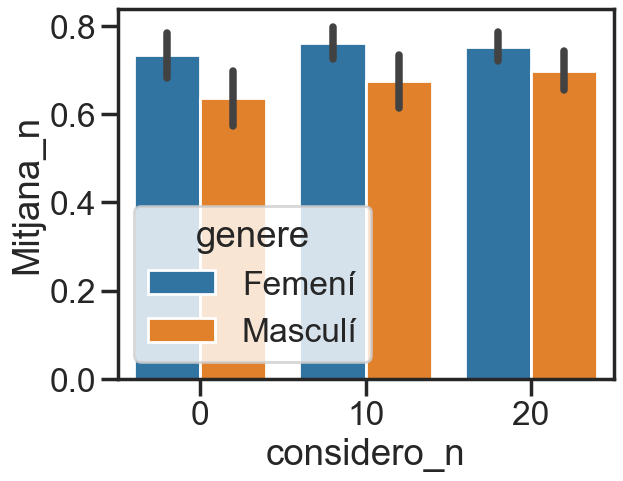

In [124]:
sns.barplot(x='considero_n', y='Mitjana_n', hue='genere', data=df1)

In [125]:
mod = ols(formula='Mitjana_n ~ considero_n', data=df1[df1['genere']=='Masculí']).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mitjana_n   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.636
Date:                Thu, 06 Jul 2023   Prob (F-statistic):              0.106
Time:                        17:31:37   Log-Likelihood:                 16.195
No. Observations:                 197   AIC:                            -28.39
Df Residuals:                     195   BIC:                            -21.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6387      0.028     22.817      0.000       0.584       0.694
considero_n     0.0031      0.002      1.624      0.106      -0.001       0.007
==============================================================================
Omnibus:                       15.099   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.658
Skew:                          -0.401   Prob(JB):                      0.00799
Kurtosis:                       2.270   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
mod = ols(formula='Mitjana_n ~ considero_n*genere', data=df1).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mitjana_n   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.710
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           0.000769
Time:                        17:31:38   Log-Likelihood:                 69.018
No. Observations:                 442   AIC:                            -130.0
Df Residuals:                     438   BIC:                            -113.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7404      0.023     31.997      0.000       0.695       0.786
genere[T.Masculí]                -0.1017      0.035     -2.923      0.004      -0.170      -0.033
considero_n                       0.0008      0.002      0.507      0.612      -0.002       0.004
considero_n:genere[T.Masculí]     0.0023      0.002      0.974      0.330      -0.002       0.007
==============================================================================
Omnibus:                       33.339   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.845
Skew:                          -0.714   Prob(JB):                     3.67e-09
Kurtosis:                       3.262   Cond. No.                         64.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='cole_ses', ylabel='Mitjana_n'>

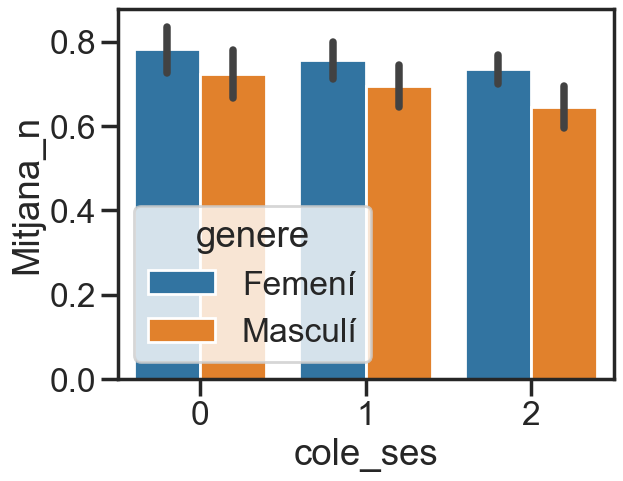

In [127]:
sns.barplot(x='cole_ses', y='Mitjana_n', hue='genere', data=df1)

In [128]:
mod = ols(formula='Mitjana_n ~ cole_ses*genere', data=df1).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mitjana_n   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     6.860
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           0.000159
Time:                        17:31:41   Log-Likelihood:                 70.687
No. Observations:                 442   AIC:                            -133.4
Df Residuals:                     438   BIC:                            -117.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7809      0.026     29.515      0.000       0.729       0.833
genere[T.Masculí]             -0.0542      0.038     -1.426      0.155      -0.129       0.021
cole_ses                      -0.0228      0.017     -1.348      0.178      -0.056       0.010
cole_ses:genere[T.Masculí]    -0.0171      0.025     -0.690      0.491      -0.066       0.032
==============================================================================
Omnibus:                       31.829   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.757
Skew:                          -0.695   Prob(JB):                     1.04e-08
Kurtosis:                       3.254   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mitjana_n   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     8.363
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           2.04e-05
Time:                        17:35:56   Log-Likelihood:                 72.850
No. Observations:                 442   AIC:                            -137.7
Df Residuals:                     438   BIC:                            -121.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.4847      0.105      4.619      0.000       0.278       0.691
genere[T.Masculí]                  -0.0390      0.151     -0.258      0.797      -0.337       0.259
valora_taller                       0.0289      0.011      2.549      0.011       0.007       0.051
valora_taller:genere[T.Masculí]    -0.0037      0.016     -0.223      0.823      -0.036       0.029
==============================================================================
Omnibus:                       30.105   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.322
Skew:                          -0.664   Prob(JB):                     3.52e-08
Kurtosis:                       3.312   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

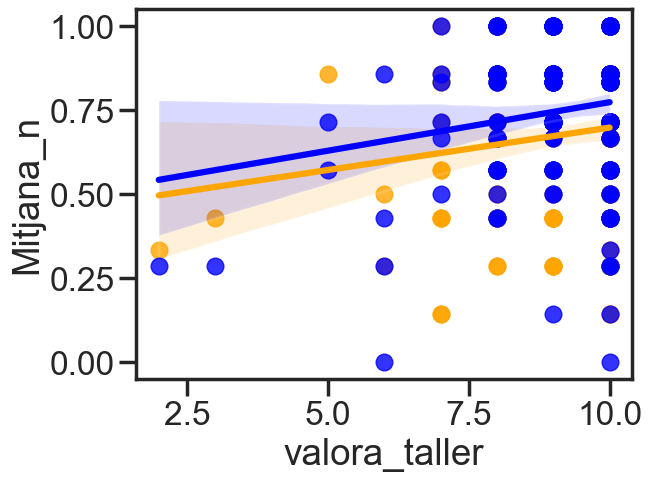

In [137]:


sns.regplot(x='valora_taller', y='Mitjana_n', data=df1.loc[df1['genere']=='Masculí'], color='orange')
sns.regplot(x='valora_taller', y='Mitjana_n', data=df1.loc[df1['genere']=='Femení'], color='blue')


mod = ols(formula='Mitjana_n ~ valora_taller*genere', data=df1).fit()
mod.summary()

<Axes: xlabel='cole_ses', ylabel='valora_taller'>

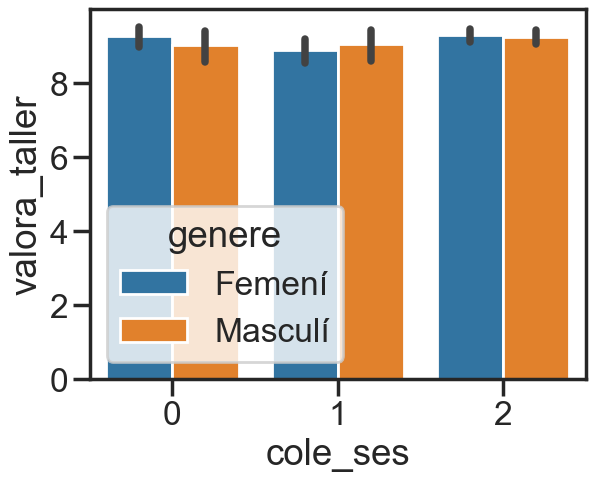

In [139]:
sns.barplot(x='cole_ses', y='valora_taller', hue='genere', data=df1)

In [140]:
mod = ols(formula='valora_taller ~ cole_ses*genere', data=df1).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          valora_taller   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6891
Date:                Thu, 06 Jul 2023   Prob (F-statistic):              0.559
Time:                        17:37:31   Log-Likelihood:                -705.71
No. Observations:                 442   AIC:                             1419.
Df Residuals:                     438   BIC:                             1436.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.0752      0.153     59.213      0.000       8.774       9.376
genere[T.Masculí]             -0.0888      0.220     -0.403      0.687      -0.522       0.344
cole_ses                       0.0801      0.098      0.818      0.414      -0.112       0.273
cole_ses:genere[T.Masculí]     0.0347      0.144      0.242      0.809      -0.247       0.317
==============================================================================
Omnibus:                      239.553   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1629.489
Skew:                          -2.292   Prob(JB):                         0.00
Kurtosis:                      11.214   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""